In [ ]:
'''
load images into python
determine shape of image arrays
build function to determine whether images are greyscale
'''

import os
#import matplotlib.pyplot as plt
import numpy as np
from skimage import color, io
from skimage.io import imread_collection, imshow, imsave
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from PIL import Image

dir_name = '../../dataset/images/'
image_list = []
greyscale = []
image_size = []

# list .jpg files in img directory
for root, dirs, files in os.walk(dir_name):
    for file in files:
        if file.endswith('.jpg'):
            image_list.append(file)
            
# create a collection with the available images
col = imread_collection(os.path.join(dir_name, '*.jpg'))
image = col[140]

print(type(image))
print(image.shape)
print(image)

image_gray=rgb2gray(image)
print(type(image_gray))
print(image_gray.shape)
print(image_gray)

image_reshaped = np.reshape(image_gray, (512, 512, 1))
print(type(image_reshaped))
print(image_reshaped.shape)
print(image_reshaped)


image_rescaled = rescale(image_gray, 1.0 / 2.0, anti_aliasing=False, multichannel=False)
print(type(image_rescaled))
print(image_rescaled.shape)
print(image_rescaled)

image_reshaped = np.reshape(image_rescaled, (256, 256, 1))
print(type(image_reshaped))
print(image_reshaped.shape)
print(image_reshaped)





In [ ]:
# create list of .jpg files in yes_img directory
for root, dirs, files in os.walk(yes_dir):
    for file in files:
        if file.endswith('.jpg'):
            yes_imgs.append(file)

# create list of .jpg files in no_img directory
for root, dirs, files in os.walk(no_dir):
    for file in files:
        if file.endswith('.jpg'):
            no_imgs.append(file)

In [ ]:


yes_imgs.sort()  # make sure that the filenames have a fixed order before shuffling
random.shuffle(yes_imgs) # shuffles the ordering of filenames (deterministic given the chosen seed)

yes_split_1 = int(0.8 * len(yes_imgs))
yes_split_2 = int(0.9 * len(yes_imgs))
yes_train = yes_imgs[:yes_split_1]
yes_validation = yes_imgs[yes_split_1:yes_split_2]
yes_test = yes_imgs[yes_split_2:]

no_imgs.sort()  # make sure that the filenames have a fixed order before shuffling
random.shuffle(no_imgs) # shuffles the ordering of filenames (deterministic given the chosen seed)

no_split_1 = int(0.8 * len(no_imgs))
no_split_2 = int(0.9 * len(no_imgs))
no_train = no_imgs[:no_split_1]
no_validation = no_imgs[no_split_1:no_split_2]
no_test = no_imgs[no_split_2:]


In [ ]:
# move yes training data
move_images(yes_train, yes_dir, '../../data/train/1/')
# move yes testing data
move_images(yes_test, yes_dir, '../../data/test/1/')
# move yes validation data
move_images(yes_validation, yes_dir, '../../data/validation/1/')


# move no training data
move_images(no_train, no_dir, '../../data/train/0/')
# move no testing data
move_images(no_test, no_dir, '../../data/test/0/')
# move no validation data
move_images(no_validation, no_dir, '../../data/validation/0/')



In [ ]:
# create function to test whether images are greyscale
def is_grey_scale(img_path):
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b:
                return False
    return True

# test set of images for greyscale 
for i in image_list:
    image = os.path.join(dir_name, i)
    greyscale.append(is_grey_scale(image))
    
#print(image_list)
print(greyscale)

In [ ]:
'''
attempt to add border to select images, rerun segmentation
'''

from PIL import Image, ImageOps

def add_border(input_image, output_image, border, color=0):
    img = Image.fromarray(input_image)
 
    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill=color)
    else:
        raise RuntimeError('Border is not an integer or tuple!')
    bimg.save(output_image)
    return bimg

def trim(input_image):
    img = input_image
    ImageOps.crop(img, border=10)
    return cmimg



In [ ]:
##### Create border around image (to allow detection of body wall as distinct body)
im = np.pad(im, pad_width=1, mode='constant', constant_values=255)


In [ ]:
img = img_masks[2]
img_name = img_names[2]
dir_out = '../../dataset/masks/'
filename='{}{}'.format(dir_out, img_name)

img = img.astype(np.uint8)  #convert to an unsigned byte
img*=255
cv2.imshow('Indices',img)

print(filename)

print(img)
imshow(img)

cv2.imwrite('img_mask.jpg', img)


In [ ]:
img = images[1]

#Image.fromarray(images[1])
bimg = add_border(input_image=img, output_image='../../image_border.jpg', border=10, color = 'white')

print(bimg)
imshow(np.array(bimg))

cmimg = trim(bimg)
print(tbimg)

img = np.array(tbimg)
print(img)
imshow(img)

In [ ]:
#bimg = io.imread('../../image_border.jpg')

#mbimg = segment_lungs(bimg)

#cmimg = trim(mbimg)

fig, ax = plt.subplots(1,4, figsize = (16,8))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(bimg, cmap='gray')
ax[2].imshow(mbimg, cmap='gray')
ax[3].imshow(mbimg, cmap='gray')


In [ ]:
'''
experiment with canny edge detection and hough transform
'''

img = io.imread('../../dataset/images/17049.jpg')
edges = cv2.Canny(img,50,150,apertureSize = 3)

#minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, 
                        threshold=100,lines=np.array([]), 
                        minLineLength=1)

fig, ax = plt.subplots(1,2, figsize = (20,20))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(edges, cmap='gray')

print(lines)

#a,b,c = lines.shape
#for i in range(a):
#    cv2.line(img, (lines[i][0][0], lines[i][0][1]), 
#             (lines[i][0][2], lines[i][0][3]), 
#             (0, 0, 255), 3, cv2.LINE_AA)
#    cv2.imwrite('houghlines5.jpg',img)




In [3]:
from skimage import color, io
from skimage.io import imread_collection, imshow, imsave
from skimage.color import rgb2gray
import scipy.ndimage


In [4]:

image = io.imread('../../dataset/images/17049.jpg')
image = rgb2gray(image)
    
MIN_BOUND = -1000.0
MAX_BOUND = 400.0
    
def normalize(image):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

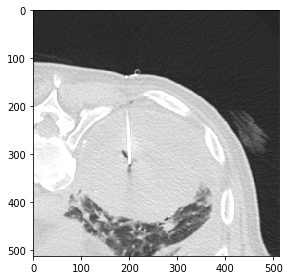

In [7]:
imshow(image)


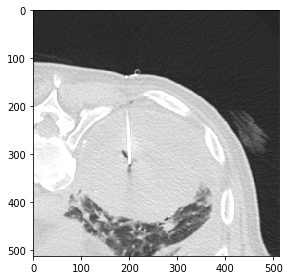

In [8]:
normalize(image)
imshow(image)